In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb


In [2]:
df = pd.read_csv("train.csv", index_col='id')
test = pd.read_csv("test.csv", index_col='id')

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_features = df.select_dtypes(include=['number']).columns

In [3]:
# fix seed

def seed_everything(seed=0):
    #random.seed(seed)
    #os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

SEED = 42
seed_everything(SEED)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


roc_auc_score (XGBoost): 0.8631454907760734
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.90      0.74      0.81      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



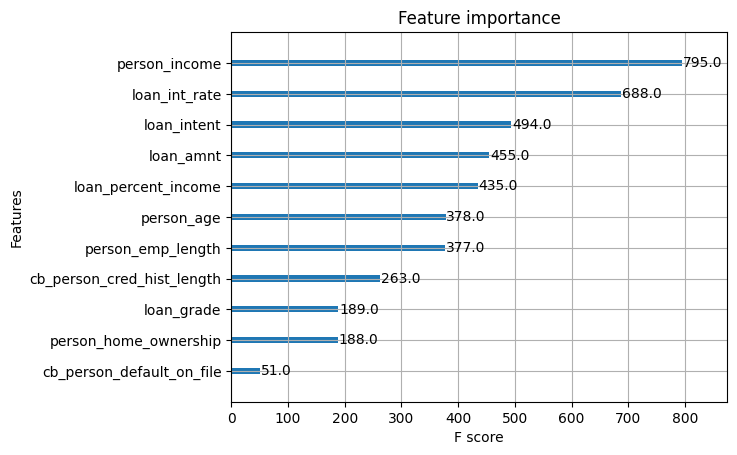

In [6]:
#정규화 X 범주형 데이터 변환 X

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

roc_auc_score (XGBoost): 0.8631454907760734
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.90      0.74      0.81      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



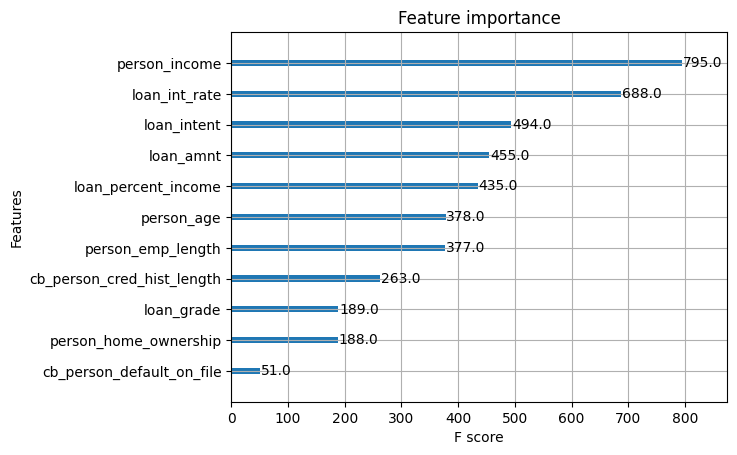

In [8]:
#정규화 X 범주형 데이터 변환 X
df = pd.read_csv("train.csv", index_col='id')

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

roc_auc_score (XGBoost): 0.8638713835613222
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.91      0.74      0.82      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



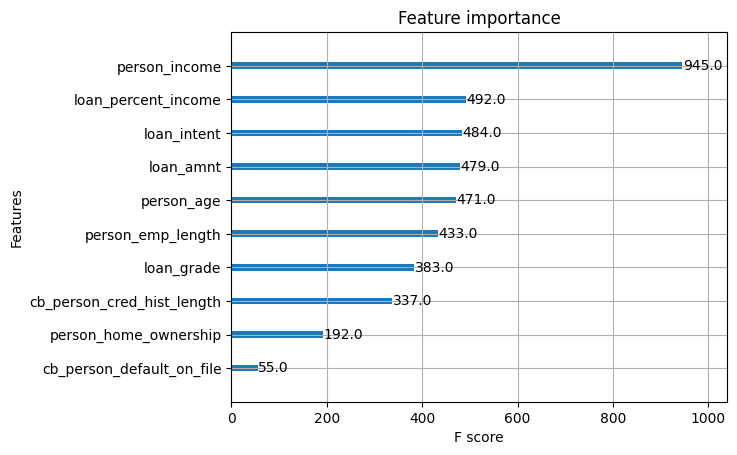

In [9]:
#정규화 X 범주형 데이터 변환 X
df = pd.read_csv("train.csv", index_col='id')

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

df = df.drop('loan_int_rate', axis=1)

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

roc_auc_score (XGBoost): 0.8541537260606771
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12613
           1       0.88      0.72      0.80      2049

    accuracy                           0.95     14662
   macro avg       0.92      0.85      0.88     14662
weighted avg       0.95      0.95      0.95     14662



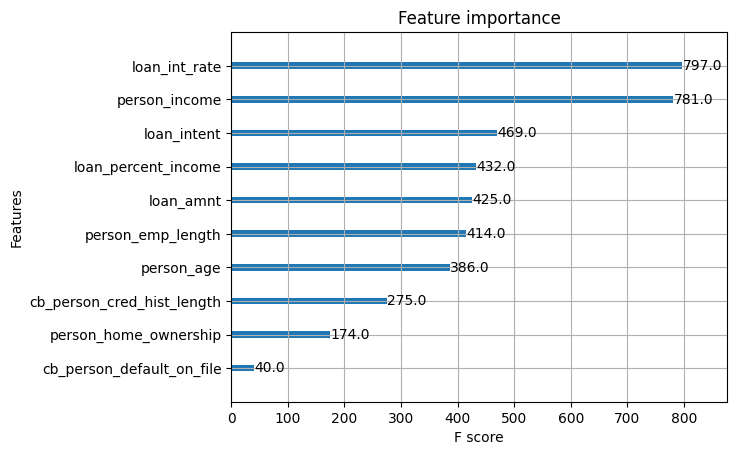

In [4]:
#정규화 X 범주형 데이터 변환 X
df = pd.read_csv("train.csv", index_col='id')

# 범주형 변수를 'category' 타입으로 변환
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[categorical_features] = df[categorical_features].astype('category')

df = df.drop('loan_grade', axis=1)

# XGBoost 모델 훈련 시 enable_categorical=True 설정
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

xgb_model = xgb.XGBClassifier(eval_metric='logloss' , enable_categorical=True, random_state=SEED)
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("roc_auc_score (XGBoost):", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 특성 중요도 시각화
xgb.plot_importance(xgb_model)
plt.show()

In [10]:
from catboost import CatBoostClassifier

# CatBoost 모델 생성 및 학습
catboost_model = CatBoostClassifier(logging_level='Silent', cat_features=categorical_features, random_state=55)
catboost_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = catboost_model.predict(X_test)
print("roc auc score (XGBoost):", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc auc score (XGBoost): 0.8634168106167005
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.91      0.74      0.82      2049

    accuracy                           0.95     14662
   macro avg       0.94      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Undersampling 객체 생성
undersampler = RandomUnderSampler(random_state=42, sampling_strategy=)

# Undersampling 적용
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTENC

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    shuffle=True, 
    random_state=SEED
)

X_train = X_train[X_train['person_income'] < 500000]

X_train['loan_status'] = y_train

df_zero = X_train[X_train['loan_status'] == 0]
df_sampled = X_train[X_train['loan_status'] == 1]

# train 데이터를 train과 valid 데이터로 분할
X_1, X_2, y1, y2 = train_test_split(
    df_zero.drop("loan_status", axis=1),
    df_zero["loan_status"],
    test_size=0.5,
    shuffle=True, 
    random_state=SEED
)

df_sampled.drop('loan_status', axis=1)

X_new = pd.concat([X_1, df_sampled.drop('loan_status', axis=1)], ignore_index=True)
y_new = pd.concat([y1, df_sampled['loan_status']], ignore_index=True)

# SMOTE를 사용하여 오버샘플링 수행
smotenc = SMOTENC(categorical_features=categorical_features, random_state=SEED)
X_new, y_new = smotenc.fit_resample(X_new, y_new)

X_train = pd.concat([X_new, X_2], ignore_index=True)
y_train = pd.concat([y_new, y2], ignore_index=True)
